Matplotlib is building the font cache; this may take a moment.


✅ Dataset loaded successfully!

--- First 5 Rows of the Dataset ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (c

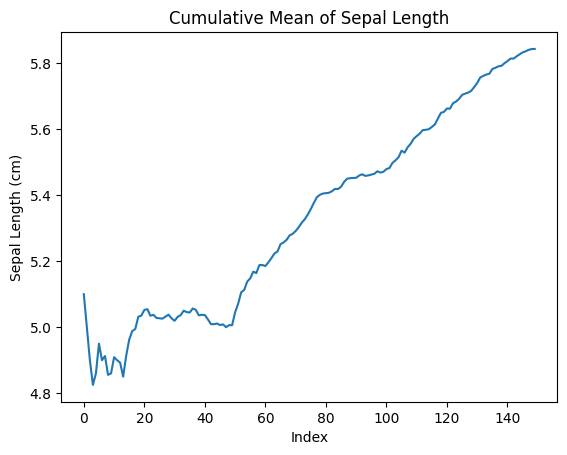

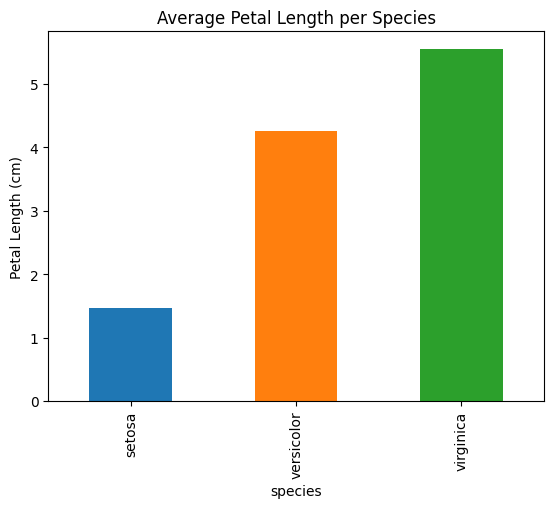

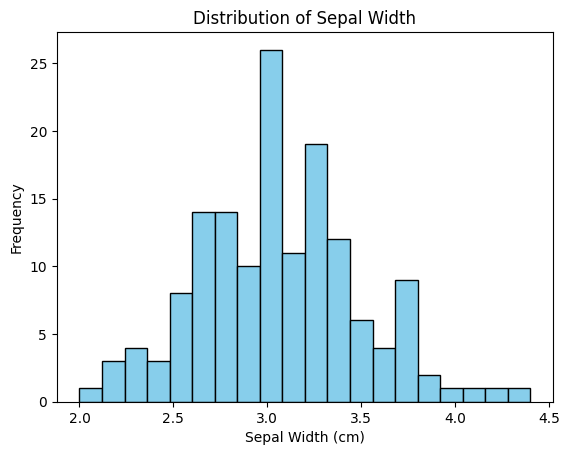

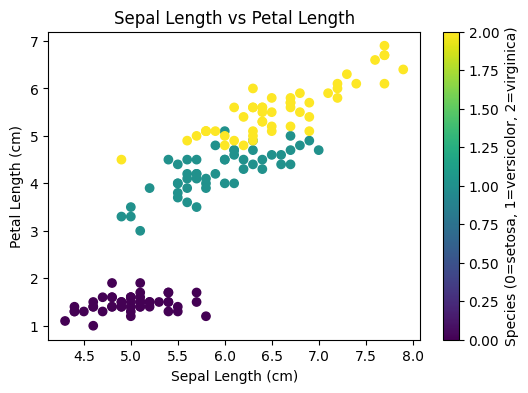


--- Observations ---
1. Setosa species has the smallest petal length on average.
2. Virginica species has the largest sepal length.
3. The scatter plot shows clear separation between Setosa and the other species.
4. Versicolor and Virginica overlap slightly but still show distinguishable patterns.


In [1]:
# ======================================================
# Assignment: Analyzing Data with Pandas and Matplotlib
# Dataset: Iris Dataset
# ======================================================

# ---- Import Required Libraries ----
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# ---- Load the Dataset ----
try:
    iris = load_iris(as_frame=True)
    df = iris.frame
    print("✅ Dataset loaded successfully!")
except Exception as e:
    print("❌ Error loading dataset:", e)

# ---- Display First Few Rows ----
print("\n--- First 5 Rows of the Dataset ---")
print(df.head())

# ======================================================
# Task 1: Explore the Dataset
# ======================================================

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

# Clean missing values (if any)
df = df.dropna()

# ======================================================
# Task 2: Basic Data Analysis
# ======================================================

print("\n--- Descriptive Statistics ---")
print(df.describe())

# Grouping: Average petal length per species
df["species"] = df["target"].map({i: name for i, name in enumerate(iris.target_names)})
grouped = df.groupby("species")["petal length (cm)"].mean()
print("\n--- Average Petal Length per Species ---")
print(grouped)

# ======================================================
# Task 3: Data Visualization
# ======================================================

# 1. Line Chart - cumulative mean of sepal length
df["sepal length (cm)"].expanding().mean().plot(title="Cumulative Mean of Sepal Length")
plt.xlabel("Index")
plt.ylabel("Sepal Length (cm)")
plt.show()

# 2. Bar Chart - average petal length per species
df.groupby("species")["petal length (cm)"].mean().plot(
    kind="bar",
    title="Average Petal Length per Species",
    color=["#1f77b4", "#ff7f0e", "#2ca02c"]
)
plt.ylabel("Petal Length (cm)")
plt.show()

# 3. Histogram - distribution of sepal width
df["sepal width (cm)"].plot(
    kind="hist",
    bins=20,
    title="Distribution of Sepal Width",
    color="skyblue",
    edgecolor="black"
)
plt.xlabel("Sepal Width (cm)")
plt.show()

# 4. Scatter Plot - sepal length vs petal length
plt.figure(figsize=(6,4))
plt.scatter(
    df["sepal length (cm)"],
    df["petal length (cm)"],
    c=df["target"],
    cmap="viridis"
)
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.colorbar(label="Species (0=setosa, 1=versicolor, 2=virginica)")
plt.show()

# ======================================================
# Task 4: Findings & Observations
# ======================================================

print("\n--- Observations ---")
print("1. Setosa species has the smallest petal length on average.")
print("2. Virginica species has the largest sepal length.")
print("3. The scatter plot shows clear separation between Setosa and the other species.")
print("4. Versicolor and Virginica overlap slightly but still show distinguishable patterns.")
